<a href="https://colab.research.google.com/github/mdasadul/indaba-2018-pytorch/blob/master/DeepFeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 31kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59534000 @  0x7f57b284e2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 14.8MB/s 
    100% |████████████████████████████████| 2.0MB 4.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import  optim
import torchvision.transforms as transforms
from torchvision import datasets
import pdb

In [0]:
%matplotlib inline

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_data = datasets.mnist.FashionMNIST(root='/',download=True,transform=transform)
# train_valid_data, train_valid_labels, = data.train_data, data.train_labels
# train_data = train_valid_data[:-10000,:,:]
# train_labels = train_valid_labels[:-10000]
# valid_data = train_valid_data[-10000:,:,:]
# valid_labels = train_valid_labels[:-10000:]
test_data= datasets.mnist.FashionMNIST('/',False,transform=transform)
# test_data, test_labels = test.test_data, test.test_labels

In [0]:

batch_size = 64
input_size = 28
number_iters = 6000
hidden_size = 20
num_layers = 3
output_size = 10
num_directions = 1
dropout = 0.1
num_batch = len(train_data)/batch_size
num_epochs = int(number_iters/num_batch)
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_iter = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True,num_workers=4)

In [18]:
class DeepFeedForward(nn.Module):
  def __init__(self, input_size, hidden_size, output_size,num_layers=1, num_directions=1, dropout=0.1):
    super(DeepFeedForward, self).__init__()
    #self.lin = nn.Linear(input_dim, hidden_dim)
    self.rnn = nn.RNN(input_size, hidden_size,batch_first = True,num_layers=num_layers, nonlinearity = 'relu')
    self.out = nn.Linear(hidden_size,output_size)
    self.drop = nn.Dropout(p=dropout)
    self.hidden_size = hidden_size
    self.num_layers=num_layers
    self.num_directions= num_directions
    
  def forward(self, X):
    h_0 = torch.zeros(self.num_layers*self.num_directions, X.size(0),self.hidden_size)
    out, hid= self.rnn(X,h_0)
    return self.out(out[:,-1,:])
    
model = DeepFeedForward(input_size,hidden_size,output_size, num_layers, num_directions, dropout)
print(model)

DeepFeedForward(
  (rnn): RNN(28, 20, num_layers=3, batch_first=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
  (drop): Dropout(p=0.1)
)


In [0]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [21]:
sequence_length = 28
iter = 0
for epoch in range(num_epochs):
  for data, labels in train_iter:
    optimizer.zero_grad()
    #pdb.set_trace()
    pred = model(data.view(-1,sequence_length,input_size))
    loss=loss_fn(pred, labels)
    loss.backward()
    optimizer.step() 
    
    iter +=1
    if iter%1000==0:
      #print(loss.data.numpy())
      correct_output = 0
      number_of_items=0
#       pdb.set_trace()
      for tdata,tlabel in test_iter:
        pred_test=model(tdata.view(-1,sequence_length,input_size))
        pred_prob_class = torch.max(pred_test.data,1)
        number_of_items +=test_label.size(0)
        pred_prob, pred_class =pred_prob_class
       
        correct_output +=(pred_class==tlabel).sum()
        #pdb.set_trace()
        
      print(" Loss = %0.2f Accuracy =%0.3f"%(loss.data.numpy(),correct_output.data.numpy()*1.0/number_of_items))
# fig,ax = plt.subplots(5,5)
# for item in pred[:25]:
# ax.imshow(item)

 Loss = 0.83 Accuracy =0.781
 Loss = 0.50 Accuracy =0.800
 Loss = 0.63 Accuracy =0.806
 Loss = 0.38 Accuracy =0.821
 Loss = 0.63 Accuracy =0.821


In [62]:
test_iter

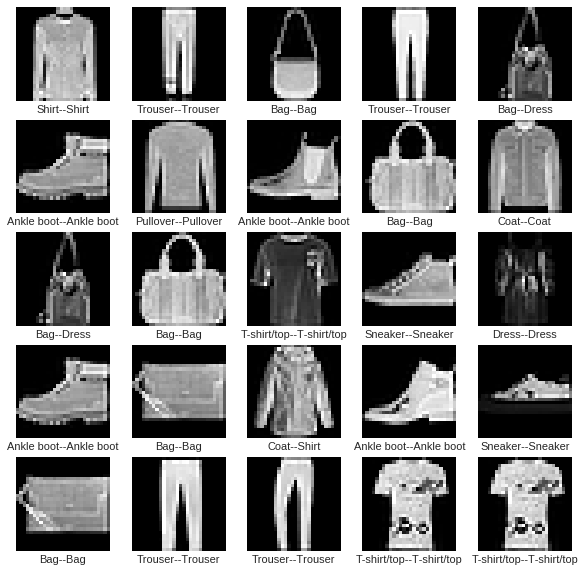

In [70]:
plt.figure(figsize=(10,10))
for (items,labels) in test_iter:
  pred = model(items.view(-1,sequence_length,input_size))
  pred_prob_class = torch.max(pred,1)
  pred_probs, pred_classes = pred_prob_class
  for i in  range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    ind = np.random.randint(len(labels))
    #pdb.set_trace()
    #for a in ax:
    plt.imshow(items[ind].squeeze(),cmap=plt.cm.gray)
    plt.xlabel(text_labels[labels[ind]]+"--"+text_labels[pred_classes[ind]])
  if True:
    break